## Kryptovaluutta - Mitä se on?
Kryptovaluutta on digitaalinen tai virtuaalinen valuutta, joka käyttää kryptografiaa turvallisuuden varmistamiseen. Se on hajautettu ja toimii lohkoketjuteknologian periaatteella. Kryptovaluuttojen kaksi tunnetuinta esimerkkiä ovat Bitcoin ja Ethereum. Projektityössäni keskityn analysoimaan Bitcoinin ja Ethereumin hintakehitystä vuosien aikana.

## Bitcoin
- Bitcoin luotiin vuonna 2009
- Ensimmäinen lohkoketjuun perustuva kryptovaluutta ja sen tarkoitus oli luoda hajautettu, digitaalinen valuutta ilman keskuspankin hallintaa.

## Ethereum
- Ethereum kehitettiin ja julkistettiin vuonna 2015
- Ethereum käyttää lohkoketjuteknologiaa kuten Bitcoin, mutta keskeinen ero on sen kyky toteuttaa älysopimuksia (Smart contarct).

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asetetaan csv tiedostojen polut
bitcoin_file_path = "./data/1 Bitcoin.csv"
ethereum_file_path = "./data/2 Ethereum.csv"

# Luetaan csv tiedostot ja tallennetaan ne muuttujiin bitcoin_data ja ethereum_data
bitcoin_data = pd.read_csv(bitcoin_file_path)
ethereum_data = pd.read_csv(ethereum_file_path)

# Muutetaan 'Date' sarakkeen tyyppi datetimeksi
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
ethereum_data['Date'] = pd.to_datetime(ethereum_data['Date'])

# Rajataan data vuosille 2023
btc_2023 = bitcoin_data[(bitcoin_data['Date'] >= '2023-01-01') & (bitcoin_data['Date'] <= '2023-12-31')]
eth_2023 = ethereum_data[(ethereum_data['Date'] >= '2023-01-01') & (ethereum_data['Date'] <= '2023-12-31')]

# Asetetaan 'Date' sarakkeen indeksiksi
bitcoin_data.set_index('Date', inplace=True)
ethereum_data.set_index('Date', inplace=True)


In [92]:
# Selvitä puuttuvat arvot
missing_values_count_btc = bitcoin_data.isnull().sum()
missing_values_count_eth = ethereum_data.isnull().sum()

# Näytä puuttuvat arvot prosentteina
total_cells_btc = np.product(bitcoin_data.shape)
total_cells_eth = np.product(ethereum_data.shape)
total_missing_btc = missing_values_count_btc.sum()
total_missing_eth = missing_values_count_eth.sum()
per_of_missing_data_btc = (total_missing_btc/total_cells_btc) * 100
per_of_missing_data_eth = (total_missing_eth/total_cells_eth) * 100
print("Puuttuvat arvot prosentteina (BTC):",int(per_of_missing_data_btc), "%")
print("Puuttuvat arvot prosentteina (ETH):",int(per_of_missing_data_eth), "%")

# Näytä duplikaatit
bitcoin_duplicates = bitcoin_data.duplicated().sum()
ethereum_duplicates = ethereum_data.duplicated().sum()

print("Duplikaattien määrä (BTC):", bitcoin_duplicates,"kpl")
print("Duplikaattien määrä (ETH):", ethereum_duplicates,"kpl")



Puuttuvat arvot prosentteina (BTC): 0 %
Puuttuvat arvot prosentteina (ETH): 0 %
Duplikaattien määrä (BTC): 0 kpl
Duplikaattien määrä (ETH): 0 kpl


## Bitcoin and Ethereum Closing Price Analysis

This section focuses on visualizing the closing prices of Bitcoin and Ethereum. The data is sourced from provided CSV files and analyzed using Pandas. The objective is to observe trends and fluctuations in the closing prices over time.

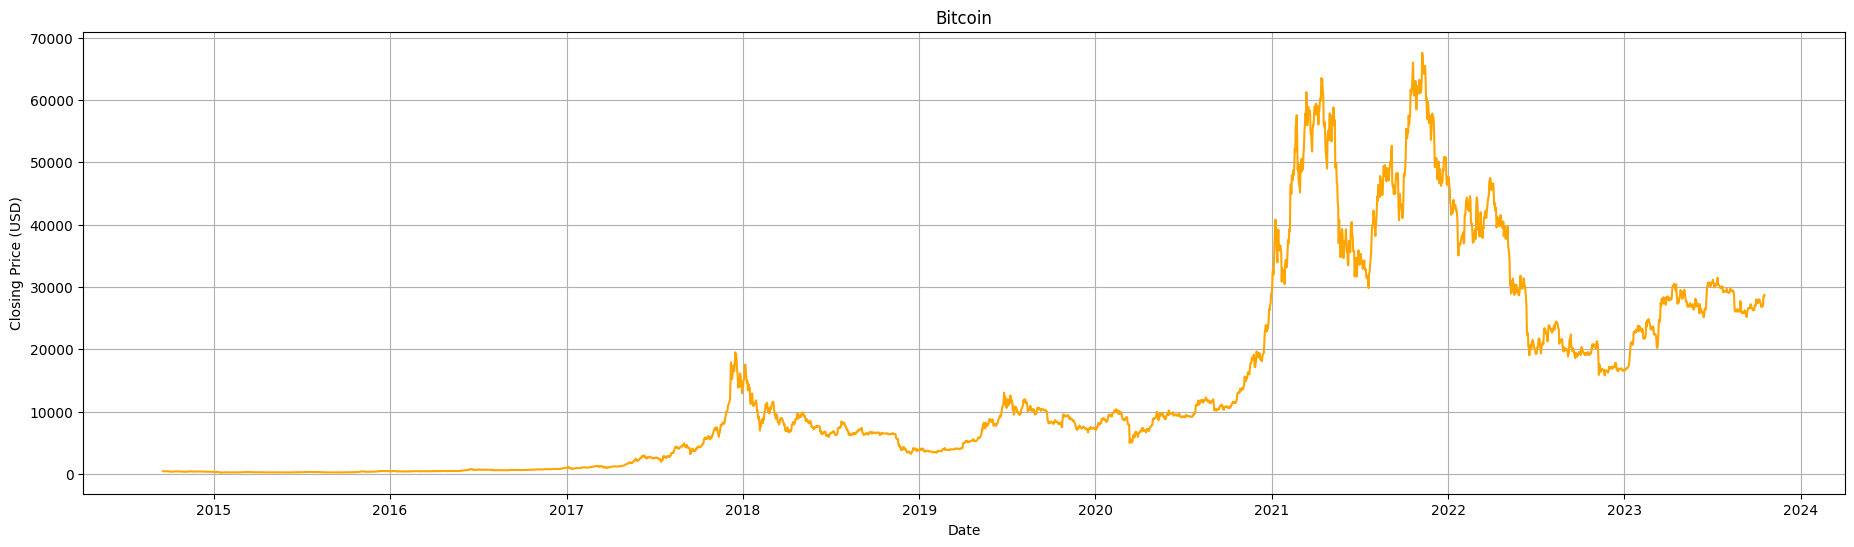

In [93]:

# Bitcoin
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 1)
plt.plot(bitcoin_data['Close'], label='Bitcoin', color='orange')
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


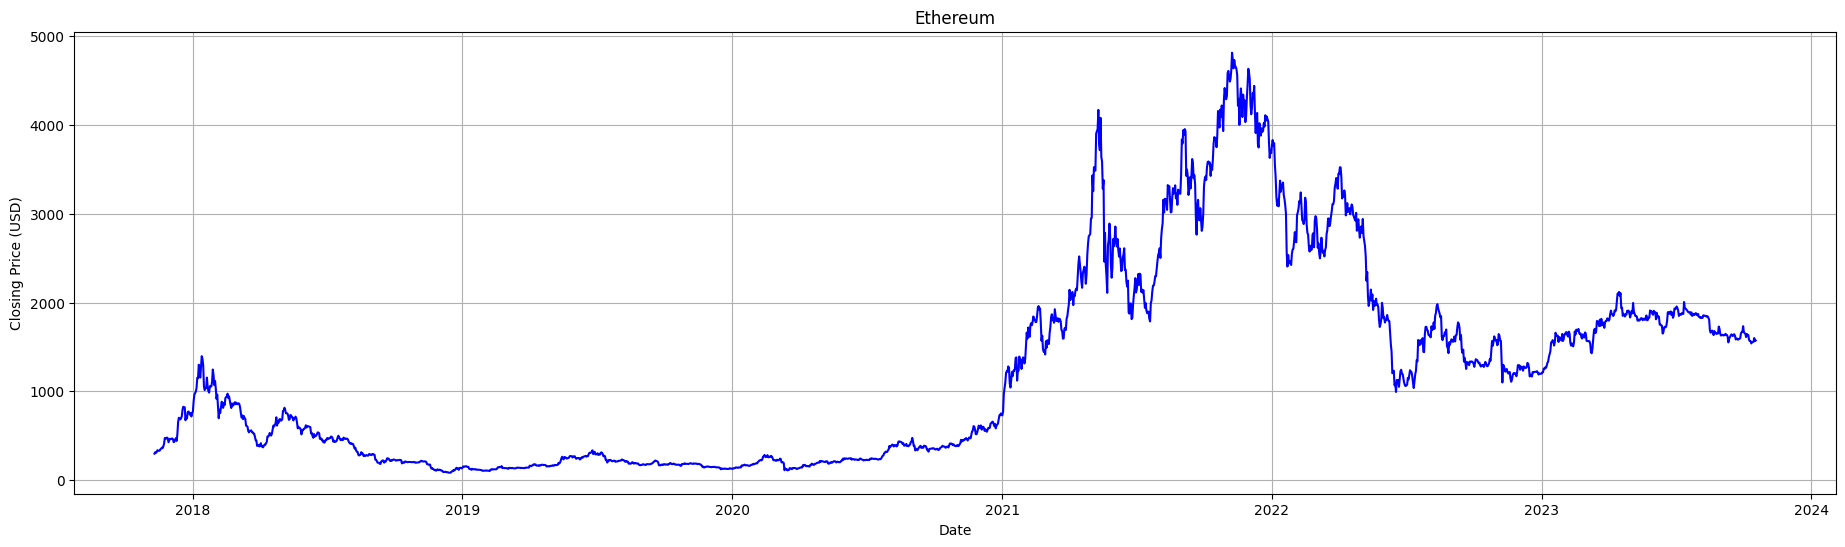

In [94]:
# Ethereum
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 2)
plt.plot(ethereum_data['Close'], label='Ethereum', color='blue')
plt.title('Ethereum')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

## Vuoden 2023 kurssien kehitys

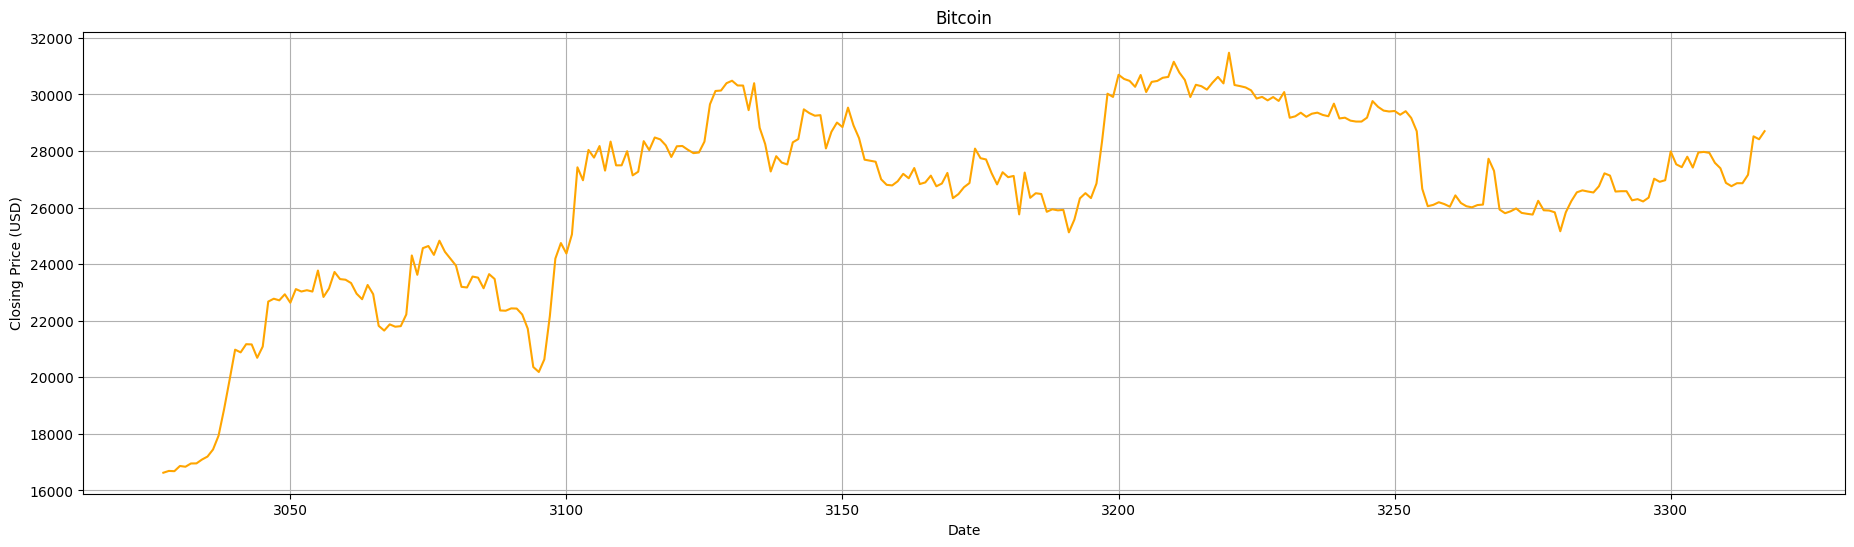

In [95]:
# BTC 2023
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 2)
plt.plot(btc_2023['Close'], label='Bitcoin', color='orange')
plt.title('Bitcoin')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

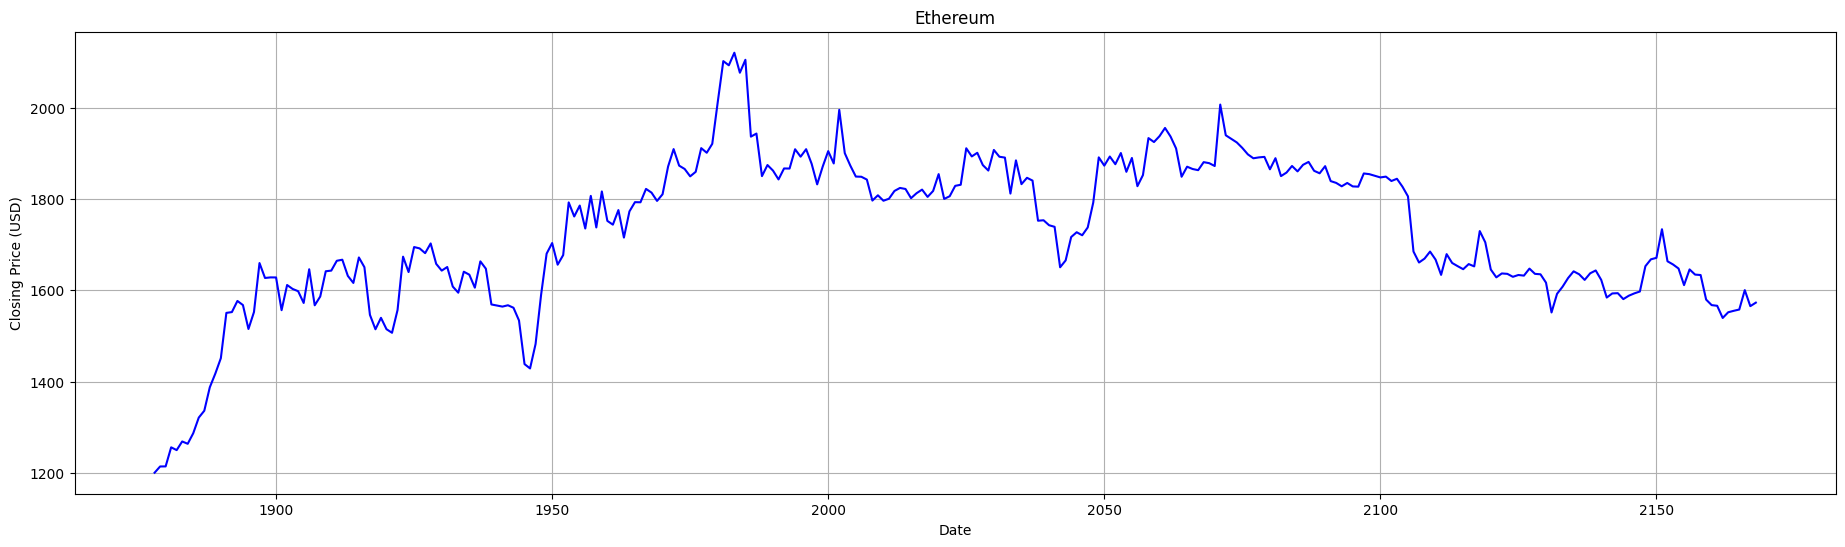

In [96]:
# ETH 2023
plt.figure(figsize=(50, 6))
plt.subplot(1, 2, 2)
plt.plot(eth_2023['Close'], label='Ethereum', color='blue')
plt.title('Ethereum')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

## Bitcoin halving

Bitcoin halving (puoliintuminen) on tapahtuma, jossa uusien bitcoinin tarjonta putoaa 50 prosenttia. Ensimmäinen Bitcoin halving tapahtui marraskuussa 2012. Halving on Bitcoinin koodiin ohjelmoitu tapahtuma, joka linkittyy vahvasti louhintaan. 

#### Miten Bitcoin Halving Toimii?

Halving tapahtuu noin neljän vuoden välein. Halving pitää huolta siitä, että bitcoinien liikkeelle laskettu määrä ei koskaan ylitä 21 miljoonaa kappaletta. Seuraava Bitcoin halving nähdään huhtikuussa 2024. Bitcoinin perustamishetkellä (2009) louhijat saivat palkkioiksi peräti 50 bitcoinia per lohko. Lohkopalkkio on puolitettu tämän jälkeen kolme kertaa: 50 BTC -> 25 BTC -> 12,5 BTC -> 6,25 BTC.